In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/salaries.csv")
df


,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [ ]:
#inputs=df.drop("salary_more_than_100k", axis="columns")

inputs=df[["company","job","degree"]]
inputs

In [ ]:
#targets=df.salary_more_than_100k
targets=df["salary_more_then_100k"]
targets

In [ ]:
inputs.shape


(16, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder
#le_company = LabelEncoder()
#le_job = LabelEncoder()
#le_degree = LabelEncoder()

In [ ]:
inputs['company_n'] = LabelEncoder().fit_transform(inputs['company'])
inputs['job_n'] = LabelEncoder().fit_transform(inputs['job'])
inputs['degree_n'] = LabelEncoder().fit_transform(inputs['degree'])

In [ ]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [ ]:
inputs_n=inputs.drop(["company","job","degree"], axis="columns")
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(inputs_n, targets)

DecisionTreeClassifier()

In [ ]:
model.score(inputs_n,targets)

1.0

In [ ]:
model.predict([[0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

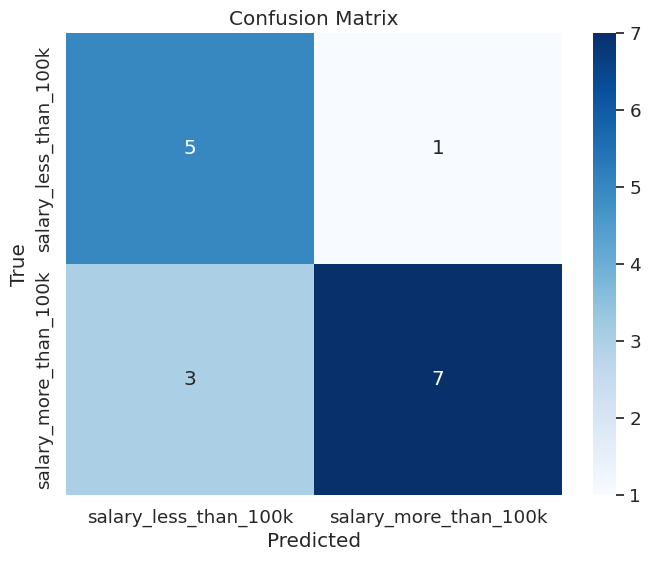

True Positives: 7
True Negatives: 5
False Positives: 1
False Negatives: 3


In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Make predictions
predicted = model.predict(inputs_n)

# Calculate the confusion matrix
cm = confusion_matrix(targets, predicted)

# Extract true positive, true negative, false positive, and false negative values
tn, fp, fn, tp = cm.ravel()

# Display the confusion matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["salary_less_than_100k", "salary_more_than_100k"], yticklabels=["salary_less_than_100k", "salary_more_than_100k"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Print true positive, true negative, false positive, and false negative
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

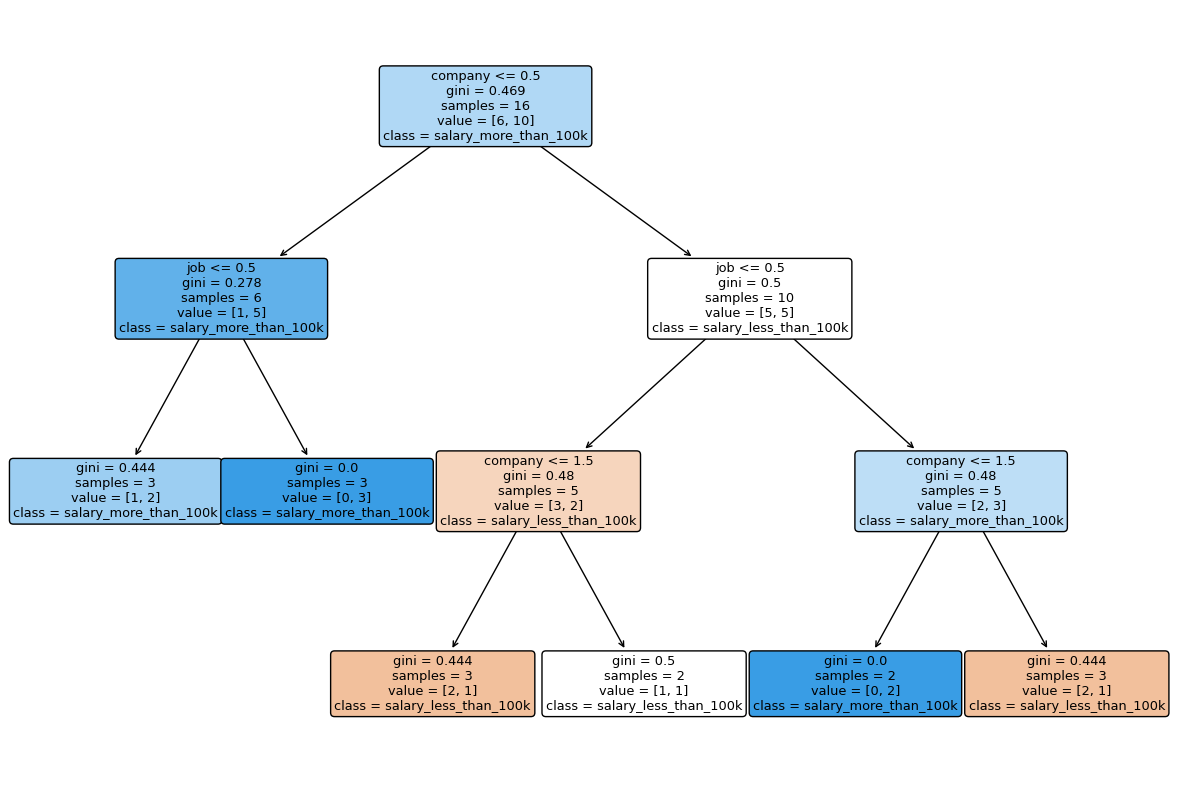

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=inputs.columns, class_names=["salary_less_than_100k", "salary_more_than_100k"], filled=True, rounded=True)
plt.show()

In [ ]:
report = classification_report(targets, predicted, target_names=["salary_less_than_100k", "salary_more_than_100k"])
print(report)


                       precision    recall  f1-score   support

salary_less_than_100k       0.62      0.83      0.71         6
salary_more_than_100k       0.88      0.70      0.78        10

             accuracy                           0.75        16
            macro avg       0.75      0.77      0.75        16
         weighted avg       0.78      0.75      0.75        16

